<a href="https://colab.research.google.com/github/Zedbog/Data_science_course/blob/main/Wizualizacja_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Matplotlib

In [ ]:
#zapewnia, że wykresy wyskakują jako output, a nie w osobnym oknie
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
#dane do wykresu
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]

#utworzenie rysunku (kontener na wykresy) i wykres(zawiera rysowane dane)
fig, ax = plt.subplots()
ax.plot(x, y) #komenda plot tworzy wykres liniowy
ax.grid() #dodaje siatkę
plt.show()

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 69 (delta 15), reused 59 (delta 12), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [ ]:
weather = pd.read_csv('ML-datasets/weather.csv', parse_dates=True, index_col='date') #index_col powoduje, ze kolumna daty są indexem
weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


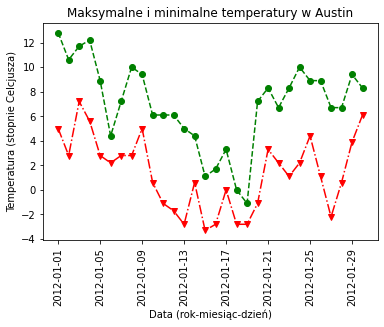

In [ ]:
n = 30 #liczba danych / obserwacji
fig, ax = plt.subplots()
ax.plot(weather.index[:n], weather.temp_max[:n], marker='o', linestyle='--', color='green')
ax.plot(weather.index[:n],weather.temp_min[:n], marker='v', linestyle='-.', color='red')
ax.set_xlabel('Data (rok-miesiąc-dzień)')
ax.set_ylabel('Temperatura (stopnie Celcjusza)')
ax.set_title('Maksymalne i minimalne temperatury w Austin')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [ ]:
austin_weather = pd.read_csv('ML-datasets/austin_weather.csv', parse_dates=True, index_col='Date')
austin_weather.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,
2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


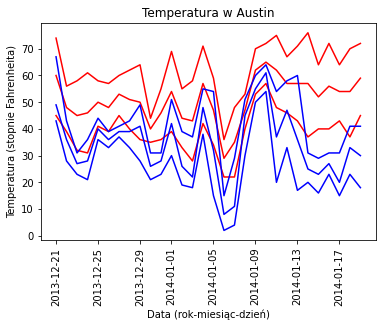

In [ ]:
n = 30
fig, ax = plt.subplots()

ax.plot(austin_weather.index[:n], austin_weather.TempAvgF[:n], color='r')
ax.plot(austin_weather.index[:n], austin_weather.TempHighF[:n], color='r')
ax.plot(austin_weather.index[:n], austin_weather.TempLowF[:n], color='r')

ax.plot(austin_weather.index[:n], austin_weather.DewPointAvgF[:n].astype(float), color='b')
ax.plot(austin_weather.index[:n], austin_weather.DewPointHighF[:n].astype(float), color='b')
ax.plot(austin_weather.index[:n], austin_weather.DewPointLowF[:n].astype(float), color='b')

ax.set_xlabel('Data (rok-miesiąc-dzień)')
ax.set_ylabel('Temperatura (stopnie Fahrenheita)')
ax.set_title('Temperatura w Austin')
ax.xaxis.set_tick_params(rotation=90)

plt.show()

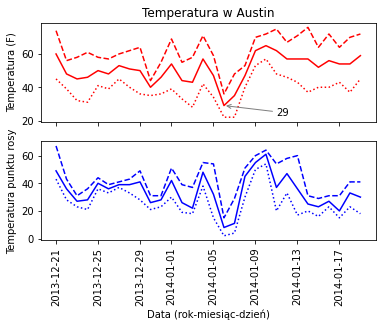

In [ ]:
n = 30
fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(austin_weather.index[:n], austin_weather.TempAvgF[:n], color='r')
ax[0].plot(austin_weather.index[:n], austin_weather.TempHighF[:n], color='r', linestyle='--')
ax[0].plot(austin_weather.index[:n], austin_weather.TempLowF[:n], color='r', linestyle='dotted')

ax[1].plot(austin_weather.index[:n], austin_weather.DewPointAvgF[:n].astype(float), color='b')
ax[1].plot(austin_weather.index[:n], austin_weather.DewPointHighF[:n].astype(float), color='b', linestyle='--')
ax[1].plot(austin_weather.index[:n], austin_weather.DewPointLowF[:n].astype(float), color='b', linestyle='dotted')

ax[1].set_xlabel('Data (rok-miesiąc-dzień)')
ax[0].set_ylabel('Temperatura (F)')
ax[1].set_ylabel('Temperatura punktu rosy')
ax[0].set_title('Temperatura w Austin')
ax[1].xaxis.set_tick_params(rotation=90)
#oznaczenie puktu na wykresie
ax[0].annotate('Coś się stało', xy=[pd.Timestamp('2014-01-06'), min(austin_weather.TempAvgF[:n])],
               xytext=[pd.Timestamp('2014-01-11'), 23],
               arrowprops={'arrowstyle': '->', 'color': 'gray'})
plt.show()

In [ ]:
co2  = pd.read_csv('ML-datasets/co2.csv', parse_dates=True, index_col='Date', na_values=-99.99)
co2.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,NaN,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


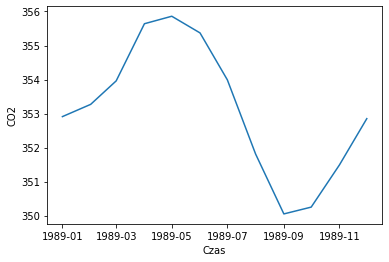

In [ ]:
fig, ax = plt.subplots()
#ax.plot(co2.index, co2.Interpolated)
millenium = co2['2000':]
#ax.plot(millenium.index, millenium.Interpolated)
osiem_dziewiec = co2['1989':'1989']
ax.plot(osiem_dziewiec.index, osiem_dziewiec.Interpolated)
ax.set_xlabel('Czas')
ax.set_ylabel('CO2')
plt.show()

In [ ]:
temperature = pd.read_csv('ML-datasets/temperature.csv', parse_dates=True, index_col='dt')
temperature.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
temperature.City.unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [ ]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239177 entries, 1849-01-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             228175 non-null  float64
 1   AverageTemperatureUncertainty  228175 non-null  float64
 2   City                           239177 non-null  object 
 3   Country                        239177 non-null  object 
 4   Latitude                       239177 non-null  object 
 5   Longitude                      239177 non-null  object 
dtypes: float64(2), object(4)
memory usage: 12.8+ MB


In [ ]:
wuhan = temperature[temperature['City'] == 'Wuhan']
wuhan.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1841-01-01,2.734,2.772,Wuhan,China,29.74N,114.46E
1841-02-01,4.574,1.952,Wuhan,China,29.74N,114.46E
1841-03-01,8.714,2.005,Wuhan,China,29.74N,114.46E
1841-04-01,15.298,2.160,Wuhan,China,29.74N,114.46E
1841-05-01,20.986,1.361,Wuhan,China,29.74N,114.46E


In [ ]:
wuhan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2073 entries, 1841-01-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             2072 non-null   float64
 1   AverageTemperatureUncertainty  2072 non-null   float64
 2   City                           2073 non-null   object 
 3   Country                        2073 non-null   object 
 4   Latitude                       2073 non-null   object 
 5   Longitude                      2073 non-null   object 
dtypes: float64(2), object(4)
memory usage: 113.4+ KB


In [ ]:
#mergujemy CO2 z temperaturą w Wuhan
merged = pd.merge(co2, wuhan, how='inner', left_index=True, right_index=True)
merged.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1958-03-01,1958.208,315.71,315.71,314.62,-1,11.905,0.237,Wuhan,China,29.74N,114.46E
1958-04-01,1958.292,317.45,317.45,315.29,-1,18.262,0.189,Wuhan,China,29.74N,114.46E
1958-05-01,1958.375,317.50,317.50,314.71,-1,20.157,0.361,Wuhan,China,29.74N,114.46E
1958-06-01,1958.458,NaN,317.10,314.85,-1,27.029,0.437,Wuhan,China,29.74N,114.46E
1958-07-01,1958.542,315.86,315.86,314.98,-1,30.392,0.433,Wuhan,China,29.74N,114.46E


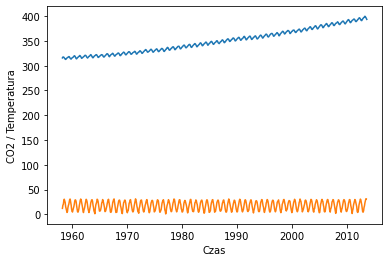

In [ ]:
fig, ax = plt.subplots()
ax.plot(merged.index, merged.Interpolated)
ax.plot(merged.index, merged.AverageTemperature)

ax.set_xlabel('Czas')
ax.set_ylabel('CO2 / Temperatura')
plt.show()

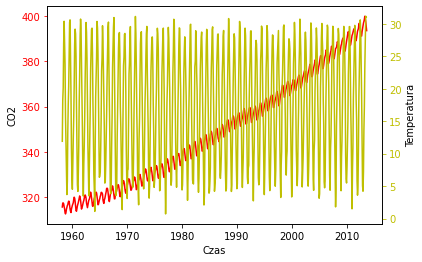

In [ ]:
fig, ax = plt.subplots()
ax.plot(merged.index, merged.Interpolated, color='r')

ax.set_xlabel('Czas')
ax.set_ylabel('CO2')
ax.tick_params('y', colors='r')

#klonujemy wykres ax
ax2 = ax.twinx()
ax2.plot(merged.index, merged.AverageTemperature, color='y')
ax2.set_ylabel('Temperatura')
ax2.tick_params('y', colors='y')
plt.show()

In [ ]:
def plot_timeseries(axis, x, y, color, xlabel, ylabel):
  axis.plot(x, y, color=color)
  axis.set_xlabel(xlabel)
  axis.set_ylabel(ylabel)
  axis.tick_params('y', colors=color)

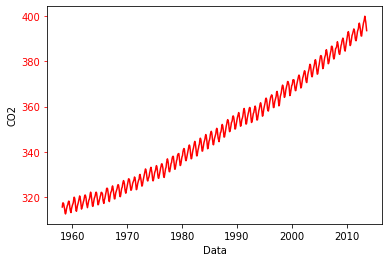

In [ ]:
fig, ax = plt.subplots()
plot_timeseries(ax, merged.index, merged.Interpolated, 'r', 'Data', 'CO2')

In [ ]:
population = pd.read_csv('ML-datasets/population.csv', index_col='City')
#population.sample(5)
#grupujemy po płci
groupby = population.groupby('Sex')
print(groupby.groups) #wyświetlanie grup
#list comprehension dla wszsytkich grup
both, female, male = [groupby.get_group(x) for x in groupby.groups]
display(both)

{'Both Sexes': ['Bialystok', 'Bielsko-Biala', 'Bydgoszcz', 'Bytom', 'Chorzów', 'Czestochowa', 'Dabrowa Górnicza', 'Elblag', 'Gdansk', 'Gdynia', 'Gliwice', 'Gorzów Wielkopolski', 'Grudziadz', 'Jastrzebie-Zdrój', 'Kalisz', 'Katowice', 'Kielce', 'Koszalin', 'Kraków', 'Legnica', 'Lódz', 'Lublin', 'Olsztyn', 'Opole', 'Plock', 'Poznan', 'Radom', 'Ruda Slaska', 'Rybnik', 'Rzeszów', 'Slupsk', 'Sosnowiec', 'Szczecin', 'Tarnów', 'Torun', 'Tychy', 'Walbrzych', 'WARSZAWA', 'Wloclawek', 'Wroclaw', 'Zabrze', 'Zielona Góra'], 'Female': ['Bialystok', 'Bielsko-Biala', 'Bydgoszcz', 'Bytom', 'Chorzów', 'Czestochowa', 'Dabrowa Górnicza', 'Elblag', 'Gdansk', 'Gdynia', 'Gliwice', 'Gorzów Wielkopolski', 'Grudziadz', 'Jastrzebie-Zdrój', 'Kalisz', 'Katowice', 'Kielce', 'Koszalin', 'Kraków', 'Legnica', 'Lódz', 'Lublin', 'Olsztyn', 'Opole', 'Plock', 'Poznan', 'Radom', 'Ruda Slaska', 'Rybnik', 'Rzeszów', 'Slupsk', 'Sosnowiec', 'Szczecin', 'Tarnów', 'Torun', 'Tychy', 'Walbrzych', 'WARSZAWA', 'Wloclawek', 'Wroclaw'

,Country or Area,Year,Area,Sex,City type,Record Type,Reliability,Source Year,Value,Value Footnotes
City,,,,,,,,,,
Bialystok,Poland,2017,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2018,294362,"1,2"
Bielsko-Biala,Poland,2017,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2018,170005,"1,2"
Bydgoszcz,Poland,2017,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2018,352870,"1,2"
Bytom,Poland,2017,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2018,167359,"1,2"
Chorzów,Poland,2017,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2018,108205,"1,2"
Czestochowa,Poland,2017,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2018,223373,"1,2"
Dabrowa Górnicza,Poland,2017,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2018,120478,"1,2"
Elblag,Poland,2017,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2018,118925,"1,2"
Gdansk,Poland,2017,Total,Both Sexes,City proper,Estimate - de jure,"Final figure, complete",2018,463352,"1,2"


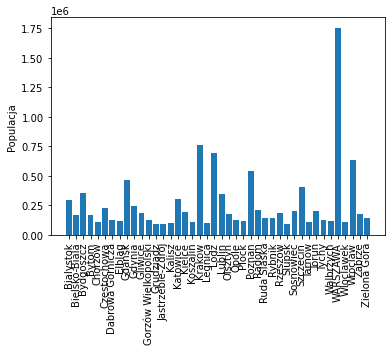

In [ ]:
fig, ax = plt.subplots()
#wykres słupkowy
ax.bar(both.index, both.Value)
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Populacja')
plt.show()

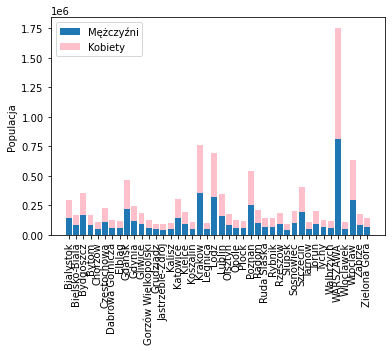

In [ ]:
fig, ax = plt.subplots()
ax.bar(male.index, male.Value, label='Mężczyźni')
ax.bar(female.index, female.Value, label='Kobiety', color='pink', bottom=male.Value)
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Populacja')
ax.legend()
plt.show()

In [ ]:
medals = pd.read_csv('ML-datasets/olympic.csv', index_col='ID')
medals.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
def groupby_column(dataframe, column):
  groupby = dataframe.groupby(column)
  #zwracamy słownik w postaci dict comprehension
  return {x: groupby.get_group(x) for x in groupby.groups}

def analyze_medals(medal_df):
  countries = groupby_column(medal_df, 'NOC')
  ret={} #tworzymy pusty słownik
  #print(countries)
  #country jako klucz i dataframe, po który siegamy
  for country, df in countries.items(): #.items() listuje rzeczy ze słownika | szukamy 
    counts = df.Medal.value_counts() #metoda .value_counts() zwraca serię unikalnych wartości dla danej kolumny posortowanych malejąco
    gold = counts.Gold if 'Gold' in counts else 0
    silver = counts.Silver if 'Silver' in counts else 0
    bronze = counts.Bronze if 'Bronze' in counts else 0
    ret[country] = (gold, silver, bronze)
  return ret
analyze_medals(medals)

In [ ]:
medals_df = pd.DataFrame.from_dict(analyze_medals(medals), 
                                   orient='index', columns=['Gold', 'Silver', 'Bronze'])
display(medals_df.sort_values('Gold', ascending=False))

,Gold,Silver,Bronze
USA,2638,1641,1358
URS,1082,732,689
GER,745,674,746
GBR,678,739,651
ITA,575,531,531
...,...,...,...
LAO,0,0,0
AHO,0,1,0
LBR,0,0,0
LCA,0,0,0


In [ ]:
#odfiltrowanie sumie zdobytych medali
new_medals = medals_df[medals_df.sum(axis=1) > 500]

In [ ]:
new_medals['Sum'] = medals_df.sum(axis=1)
new_medals = new_medals.sort_values('Sum', ascending=False)

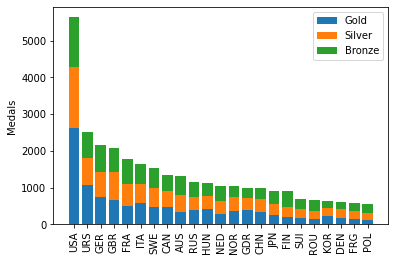

In [ ]:
fig, ax = plt.subplots()
ax.bar(new_medals.index, new_medals.Gold, label='Gold')
ax.bar(new_medals.index, new_medals.Silver, label='Silver', bottom=new_medals.Gold)
ax.bar(new_medals.index, new_medals.Bronze, label='Bronze', bottom=new_medals.Gold + new_medals.Silver)
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Medals')
ax.legend()
plt.show()

In [ ]:
all_sports = groupby_column(medals, 'Sport')

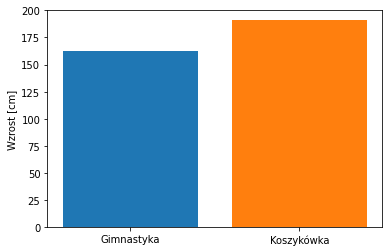

In [ ]:
fig, ax = plt.subplots()
ax.bar('Gimnastyka', all_sports['Gymnastics']['Height'].mean())
ax.bar('Koszykówka', all_sports['Basketball']['Height'].mean())
ax.set_ylabel('Wzrost [cm]')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


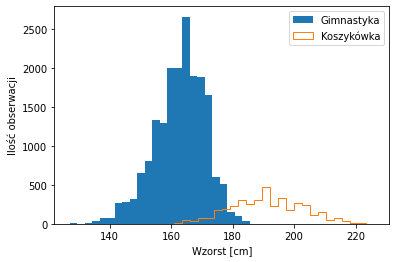

In [ ]:
fig, ax = plt.subplots()
ax.hist(all_sports['Gymnastics']['Height'], label='Gimnastyka', bins=25) #bins oznacza ile ma być słupków (dyskretyzacja)
ax.hist(all_sports['Basketball']['Height'], label='Koszykówka', bins=25, histtype='step')
ax.set_xlabel('Wzorst [cm]')
ax.set_ylabel('Ilość obserwacji')
ax.legend()
plt.show()

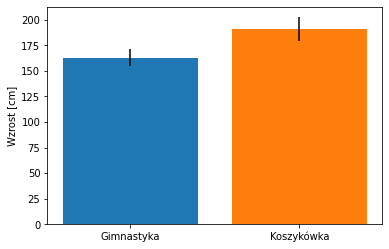

In [ ]:
fig, ax = plt.subplots()
ax.bar('Gimnastyka', all_sports['Gymnastics']['Height'].mean(), 
       yerr=all_sports['Gymnastics']['Height'].std())
ax.bar('Koszykówka', all_sports['Basketball']['Height'].mean(), 
       yerr=all_sports['Basketball']['Height'].std())
ax.set_ylabel('Wzrost [cm]')
plt.show()

In [ ]:
cars = pd.read_csv('ML-datasets/cars.csv', na_values='?')
cars.head()
all_cars = groupby_column(cars, 'make')

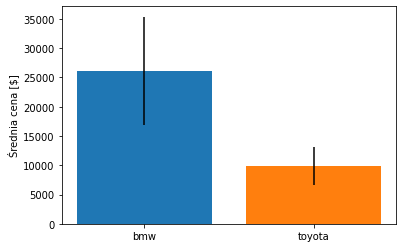

In [ ]:
fig, ax = plt.subplots()
ax.bar('bmw', all_cars['bmw']['price'].mean(),
       yerr=all_cars['bmw']['price'].std())
ax.bar('toyota', all_cars['toyota']['price'].mean(),
       yerr=all_cars['toyota']['price'].std())
ax.set_ylabel('Średnia cena [$]')
plt.show()

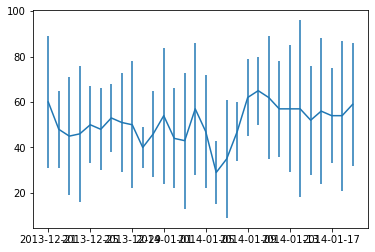

In [ ]:
#errorbar - pokazuje błędy na wykresie  liniowym .plot
fig, ax = plt.subplots()
ax.errorbar(austin_weather.index[:30], austin_weather.TempAvgF[:30],
            yerr=austin_weather.TempHighF[:30] - austin_weather.TempLowF[:30])#[::10] -> co dziesiąty
plt.show()

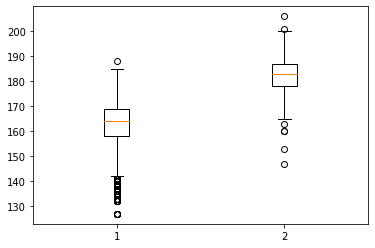

In [ ]:
#boxplot - tworzy wykres pokazujący rozkład poniżej i powyżej 5 i 95 kwantyla, rozkład między 25 -75 kwartylem oraz średnią
fig, ax = plt.subplots()
ax.boxplot([all_sports['Gymnastics']['Height'].dropna(), all_sports['Baseball']['Height'].dropna()])
plt.show()

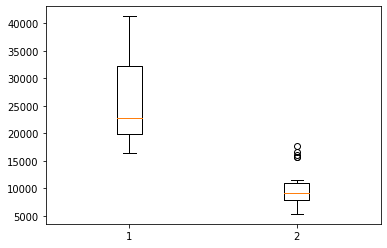

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([all_cars['bmw']['price'], all_cars['toyota']['price']])
plt.show()

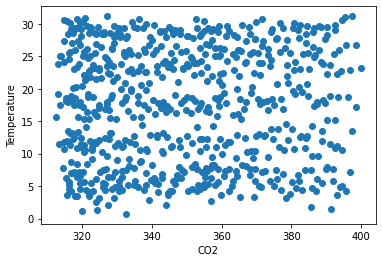

In [ ]:
#wykres punktowy
fig, ax = plt.subplots()
ax.scatter(merged.Interpolated, merged.AverageTemperature)
ax.set_xlabel('CO2')
ax.set_ylabel('Temperature')
plt.show()

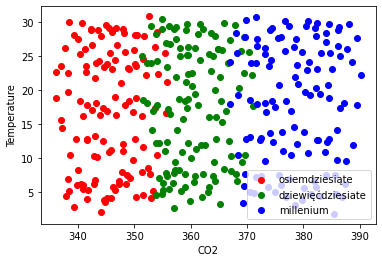

In [ ]:
#wykres punktowy z podziałem na lata dla CO2 i temperatury
osiem = merged['1980':'1989']
dziewiec = merged['1990':'1999']
millenium = merged['2000':'2009']
fig, ax = plt.subplots()
ax.scatter(osiem.Interpolated, osiem.AverageTemperature, label='osiemdziesiąte', color='r')
ax.scatter(dziewiec.Interpolated, dziewiec.AverageTemperature, label='dziewięćdziesiate', color='g')
ax.scatter(millenium.Interpolated, millenium.AverageTemperature, label='millenium', color='b')
ax.set_xlabel('CO2')
ax.set_ylabel('Temperature')
ax.legend()
plt.show()

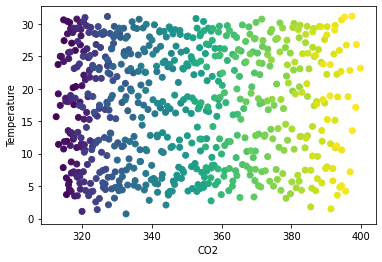

In [ ]:
fig, ax = plt.subplots()
ax.scatter(merged.Interpolated, merged.AverageTemperature, c=merged.index) #c. koloruje po wieku (najmłodszy ciemny)
ax.set_xlabel('CO2')
ax.set_ylabel('Temperature')
plt.show()

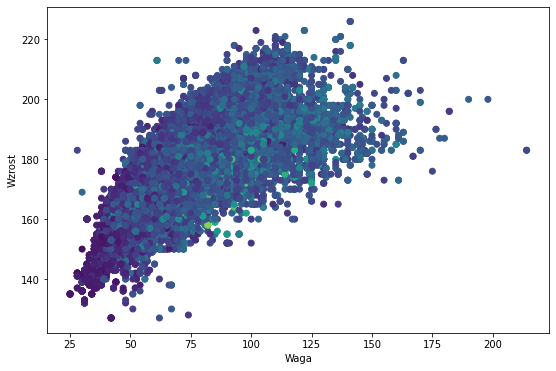

In [ ]:
fig, ax = plt.subplots()
ax.scatter(medals.Weight, medals.Height, c=medals.Age)
ax.set_xlabel('Waga')
ax.set_ylabel('Wzrost')

fig.set_size_inches([9,6]) #9 szerokość, 6 wysokość
fig.savefig('medals.png')
plt.show()

In [ ]:
from google.colab import files
files.download('medals.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#zapis w postaci pliku wektorowego
fig.savefig('medals.svg', format='svg')

In [ ]:
files.download('medals.svg')

#Seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.plotting.register_matplotlib_converters()

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

In [ ]:
wine = pd.read_csv('ML-datasets/wine.csv' )
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,one
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,one
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,one
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,one
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,one


(11.0, 14.0)

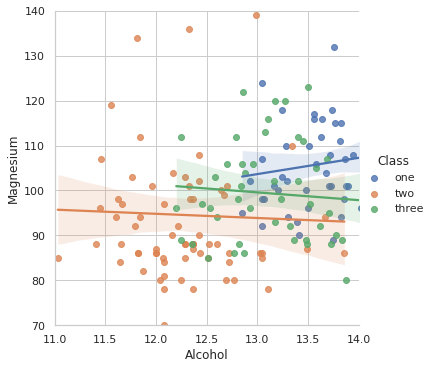

In [ ]:
#wykres punktowy od raz z aproksymacją liniową
sns.set(style='whitegrid')
sns.lmplot(x='Alcohol', y='Magnesium', data=wine, fit_reg=True, hue='Class') #fit_reg daje linię regresji
plt.ylim(70, 140) #wyznacza granice danych na osi y
plt.xlim(11,14)

Text(0, 0.5, 'Wartość')

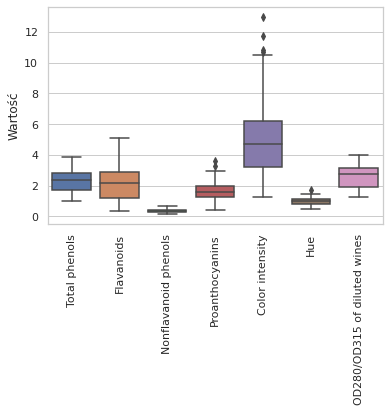

In [ ]:
wykres = sns.boxplot(data=wine.iloc[:,5:-2]) #okrojony zakres danych
wykres.xaxis.set_tick_params(rotation=90)
wykres.set_ylabel('Wartość')

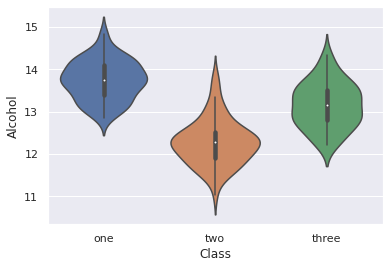

In [ ]:
sns.set_style('darkgrid')
#wykres skrzypcowy
sns.violinplot(x='Class', y='Alcohol', data=wine)

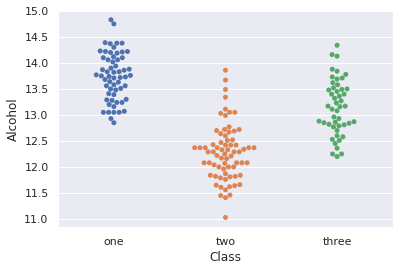

In [ ]:
#wykres rojowy
sns.swarmplot(x='Class', y='Alcohol', data=wine)

Text(0.5, 1.0, 'Alcohol depending on wine class')

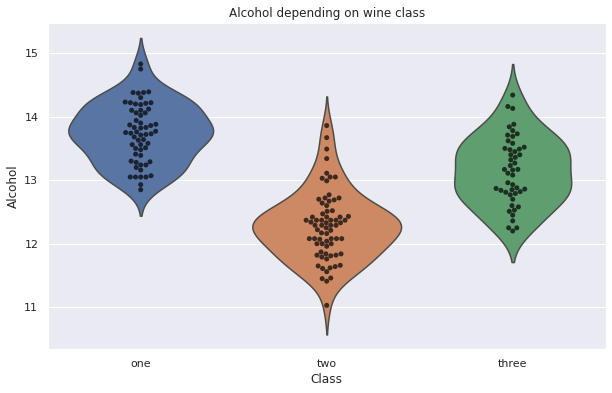

In [ ]:
#połączenie wykresu rojowego ze skrzypcowym
plt.figure(figsize=(10,6))

sns.violinplot(x='Class', y='Alcohol', data=wine, inner=None)
sns.swarmplot(x='Class', y='Alcohol', data=wine, alpha=0.7, color='black')#parametr alpha oznacza przeźroczystość
plt.title('Alcohol depending on wine class')

In [ ]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,one
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,one
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,one
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,one
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,one


In [ ]:
# Melt Data Frame -> selektywna transpozycja
wine = wine.drop('Proline', axis=1)
KeyError: "['Proline'] not found in axis"

In [ ]:
melted = pd.melt(wine.iloc[:,5:], id_vars='Class', var_name='Stat') # dajemy do meltowanie zbiór od 5-tej kolumny, wszsytkie wiersze
print(len(wine))
print(len(melted))
melted.head()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; y

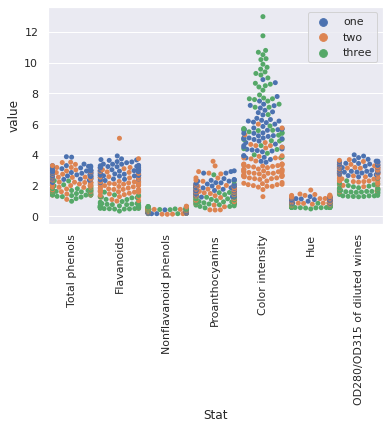

In [ ]:
wykres2 = sns.swarmplot(x='Stat', y='value', data=melted, hue='Class')
wykres2.xaxis.set_tick_params(rotation=90)
wykres2.legend()

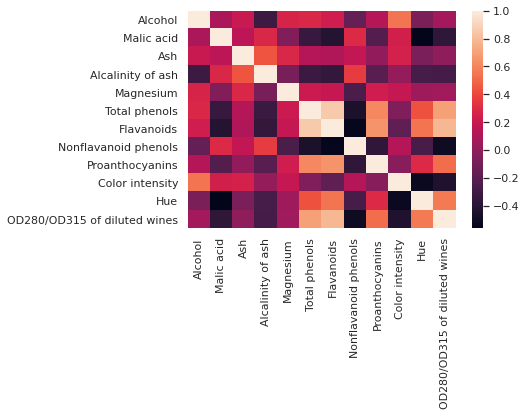

In [ ]:
corr = wine.corr() #liczenie korealcji
sns.heatmap(corr)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


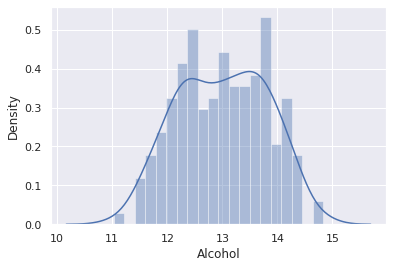

In [ ]:
#histogram
sns.distplot(wine.Alcohol, bins=20)

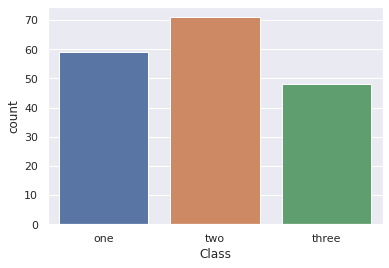

In [ ]:
# rozkład / dystrybucja 
sns.countplot(x='Class', data=wine)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


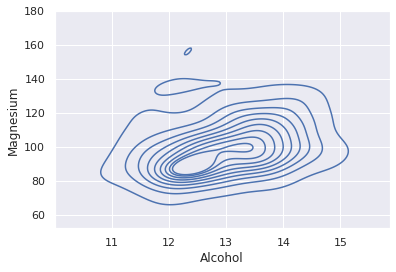

In [ ]:
# rozkład gęstości - przydatny przy duzych zbiorach danych (wtedy kiedy scatterplotem jest nieczytelnie
sns.kdeplot(wine.Alcohol, wine.Magnesium)

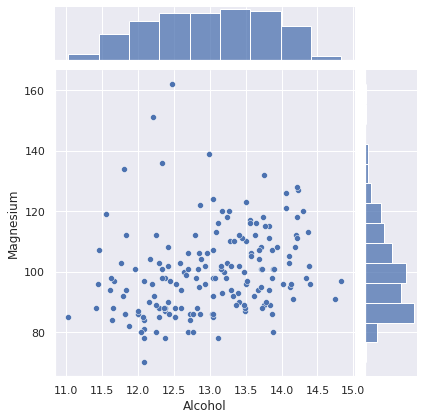

In [ ]:
# rozkład dystrybucji
sns.jointplot(x='Alcohol', y='Magnesium', data=wine)

In [ ]:
cars = pd.read_csv('ML-datasets/auto_mpg.csv', na_values='?')
cars.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


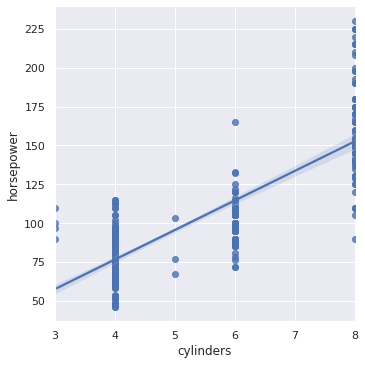

In [ ]:
# jak ilość cylindrów wpływa na ilość KM
sns.lmplot(x='cylinders', y='horsepower', data=cars)

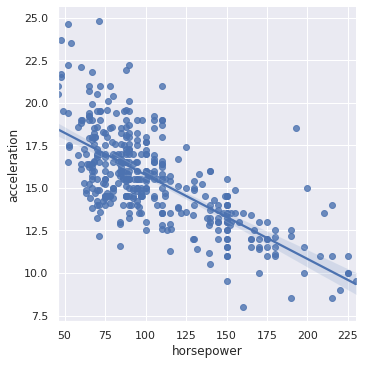

In [ ]:
sns.lmplot(x='horsepower', y='acceleration', data=cars)

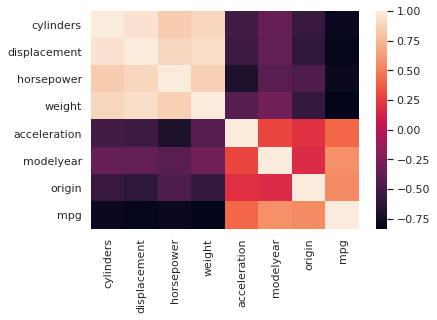

In [ ]:
# wykres korelacji
corr = cars.corr()
sns.heatmap(corr)

In [ ]:
melted = pd.melt(cars, id_vars=['origin', 'cylinders'], var_name='Stat')# id_vars -> te kolumny zostają niezmeltowane
melted.head()

,origin,cylinders,Stat,value
0,1,8,displacement,307.0
1,1,8,displacement,350.0
2,1,8,displacement,318.0
3,1,8,displacement,304.0
4,1,8,displacement,302.0


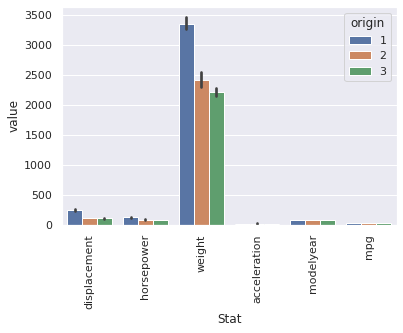

In [ ]:
wykres_cars = sns.barplot(x='Stat', y='value', data=melted, hue='origin') # hue -> daje kolor po ori origin, var_name - >nazwa kolumny, która powstanie
wykres_cars.xaxis.set_tick_params(rotation=90)

In [ ]:
melted2 = melted[melted.Stat != 'weight']

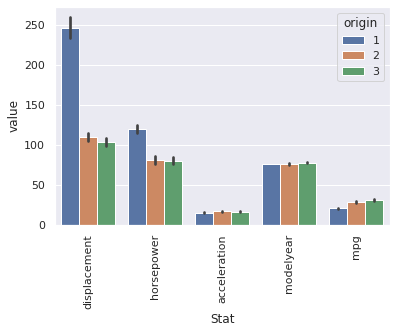

In [ ]:
wykres2_cars = sns.barplot(x='Stat', y='value', data=melted2, hue='origin') # hue -> daje kolor po ori origin, var_name - >nazwa kolumny, która powstanie
wykres2_cars.xaxis.set_tick_params(rotation=90)

#GGPlot (plotnine)

In [ ]:
#instalacja plotnine
!pip3 install plotnine

In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg # import danych
%matplotlib inline

In [ ]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


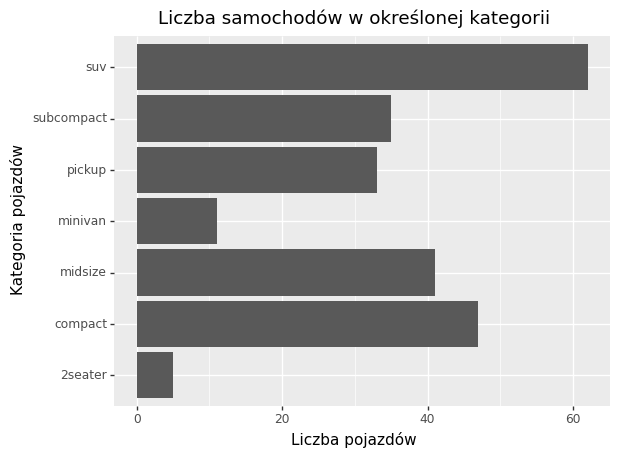

<ggplot: (-9223363260242776460)>

In [ ]:
(ggplot(mpg)  #definicja jakich danych użyć
 + aes(x='class')
 + geom_bar(size=15)
 + coord_flip() # zamiana osi
 + labs(title='Liczba samochodów w określonej kategorii', x='Kategoria pojazdów', y='Liczba pojazdów')
 ) 

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


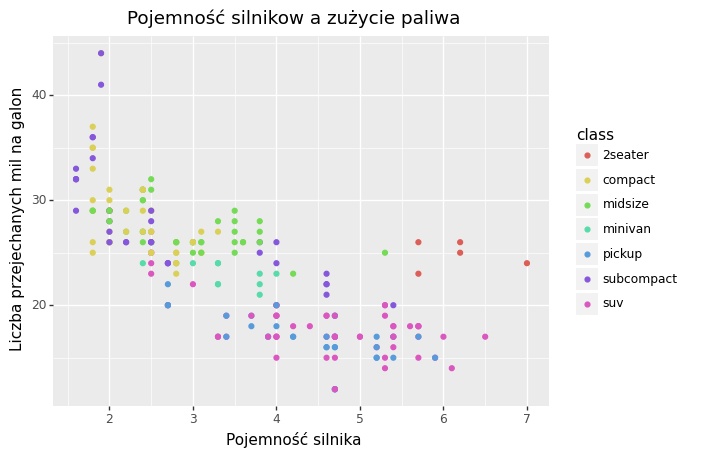

<ggplot: (8776611870356)>

In [ ]:
# wykres punktowy w ggplot
(ggplot(mpg)
 + aes(x='displ', y='hwy', color='class')  #rozróżnia kolor po class
 + geom_point()
 + labs(title='Pojemność silnikow a zużycie paliwa', x='Pojemność silnika', y='Liczba przejechanych mil na galon')
 )

#Plotly

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from plotly.offline import iplot
# import plotly.express as px

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

In [ ]:
university = pd.read_csv('ML-datasets/timesData.csv')
university.head(50)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [ ]:
print(len(university))

In [ ]:
university[university.country == 'Poland']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
511,301-350,Jagiellonian University,Poland,25.1,39.5,16.0,43.1,25.8,-,"42,835",11.5,5%,67 : 33,2012
546,301-350,University of Warsaw,Poland,21.6,35.8,15.7,44.3,-,-,"49,292",14.1,7%,67 : 33,2012
960,351-400,Jagiellonian University,Poland,22.7,41.7,13.8,48.2,29.5,-,"42,835",11.5,5%,67 : 33,2013
999,351-400,University of Warsaw,Poland,23.2,39.8,18.4,54.0,27.9,-,"49,292",14.1,7%,67 : 33,2013
1350,301-350,University of Warsaw,Poland,18.7,42.8,14.3,71.1,28.3,-,"49,292",14.1,7%,67 : 33,2014
1750,301-350,University of Warsaw,Poland,20.8,41.6,13.6,70.0,28.5,-,"49,292",14.1,7%,67 : 33,2015
2399,501-600,University of Warsaw,Poland,26.1,41.6,15.8,42.2,28.5,-,"49,292",14.1,7%,67 : 33,2016
2404,601-800,Adam Mickiewicz University,Poland,20.0,25.7,11.0,15.3,28.7,-,"40,633",15.6,1%,71 : 29,2016
2405,601-800,AGH University of Science and Technology,Poland,14.2,17.9,3.7,35.7,-,-,"35,569",17.0,1%,-,2016
2473,601-800,Gdańsk University of Technology,Poland,15.5,16.1,9.5,15.2,36.8,-,"25,217",23.3,1%,39 : 61,2016


In [ ]:
df = university.iloc[:100,:]
print(len(df))

100


In [ ]:
# tworzymy wykres
trace1 = go.Scatter(x=df.world_rank, y=df.citations, mode='lines', name='Cytowania', # mode określa czy chhcemy sam scatter czy jeszcze np. linie
                    marker=dict(color = 'rgba(16,112,2,0.8)'), text=df.university_name) # | marker w postaci slwonik okresla kolor znacznika, ap po najechaniu na niego wyświetli nazwę uniwesytetu
trace2 = go.Scatter(x=df.world_rank, y=df.teaching, mode='lines+markers', name='Poziom nauczania',
                    marker=dict(color='rgba(80,26,80,0.8)'), text=df.university_name)
# tworzymy wygląd
layout = dict(title='Cytowania w zależnosci od rankingu',
              xaxis=dict(title='Ranking światowy', ticklen=5, zeroline=False))
data = [trace1, trace2]
fig = dict(data=data, layout=layout)
iplot(fig)

In [ ]:
#trace1 = px.scatter(x=df.world_rank, y=df.citations, trendline='ols')

In [ ]:
df2014 = university[university.year == 2014].iloc[:100,:]
df2015 = university[university.year == 2015].iloc[:100,:]
df2016 = university[university.year == 2016].iloc[:100,:]

In [ ]:
trace1= go.Scatter(x=df2014.world_rank, y=df2014.citations, mode='markers', name='2014', text=df.university_name)
trace2= go.Scatter(x=df2015.world_rank, y=df2015.citations, mode='markers', name='2015', text=df.university_name)
trace3= go.Scatter(x=df2016.world_rank, y=df2016.citations, mode='markers', name='2016', text=df.university_name + '<br>' + df.country)
data = [trace1, trace2, trace3]
layout = dict(title='Porównanie uczelni w kolejnych latach 2014 - 2016', xaxis=dict(title='Ranking'),
              yaxis=dict(title='Cytowania'), width=800, height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

In [ ]:
df2014 = df2014.iloc[:3,:]

In [ ]:
#wykres słupkowy
trace1 = go.Bar(x=df2014.university_name, y=df2014.citations, name='Cytowania',
                marker=dict(line=dict(width=3)), text=df2014.university_name + '<br>' + df2014.country)
trace2 = go.Bar(x=df2014.university_name, y=df2014.teaching, name='Poziom nauczania', 
                marker=dict(line=dict(width=3)), text=df2014.university_name + '<br>' + df2014.country)
data = [trace1, trace2]
layout = go.Layout(title='Porównanie 3-ech najlepszych uczelni', barmode='group')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
# wwykres kołowy
df2016 = df2016.iloc[:7,:]

In [ ]:
pie1 =df2016.num_students
pie1

1803     2,243
1804    19,919
1805    15,596
1806    18,812
1807    11,074
1808    20,152
1809     7,929
Name: num_students, dtype: object

In [ ]:
# zamiana przecinków na kropki w pie1
pie1_list = [float(element.replace(',','.')) for element in pie1]

In [ ]:
pie1_list

[2.243, 19.919, 15.596, 18.812, 11.074, 20.152, 7.929]

In [ ]:
type(pie1_list[1])

float

In [ ]:
labels = df.university_name
fig = {
    'data': [{
        'values': pie1_list,
        'labels': labels,
        'domain': {'x': [0, .5]},
        'name': 'Procentowa liczba studentów',
        'hoverinfo': 'label + percent + name', #hoverinfo -> co ma się nam wyświeltać po najechaniu
        'hole': .3,
        'type': 'pie'
    },],
    'layout':{
        "title": 'Procentowa liczebność studentów',
        'annotations': [
                        {
                            'font': {'size':20}
                        }
        ]
    }
}
iplot(fig)

In [ ]:
trace2

Bar({
    'marker': {'line': {'width': 3}},
    'name': 'Poziom nauczania',
    'text': array(['California Institute of Technology<br>United States of America',
                   'Harvard University<br>United States of America',
                   'University of Oxford<br>United Kingdom'], dtype=object),
    'x': array(['California Institute of Technology', 'Harvard University',
                'University of Oxford'], dtype=object),
    'y': array([94.4, 95.3, 89. ])
})

In [ ]:
df2015 = df2015.iloc[:20,:]
num_students = [float(element.replace(',','.')) for element in df2015.num_students]
international = [float(element) for element in df2015.international]

In [ ]:
data = [
        {
          'x': df2015.world_rank,
          'y': df2015.teaching,
         'mode': 'markers',
         'marker': {
             'color': international,
             'size': num_students,
             'showscale': True
         },
         'text': df.university_name + '<br>' + df.international
        }
]
iplot(data)

In [ ]:
df2011 = university.student_staff_ratio[university.year == 2011]
df2012 = university.student_staff_ratio[university.year == 2012]

In [ ]:
trace1 = go.Histogram(x=df2011, opacity=0.75, name='2011')# opacity -> przeźroczystość
trace2 = go.Histogram(x=df2012, opacity=0.5, name='2012')
data = [trace1, trace2]
layout = go.Layout(barmode='overlay',# barmode='overlay' -> słupki będą na siebie nachodziły
                   title='Stosunek liczby studentów do profesorów w latach',
                   xaxis=dict(title='Liczba studentów na pracownika'),
                   yaxis=dict(title='Liczba uniwersytetów'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
#wykres pudełkowy
df2015 = university[university.year == 2015]
trace1 = go.Box(y=df2015.total_score, name='Wyniki uniwersytetów w 2015')
trace2 = go.Box(y=df2015.research, name='Badania uniwersytetów w 2015')
iplot([trace1, trace2])

In [ ]:
# macierz korelacji

In [ ]:
import numpy as np
import plotly.figure_factory as ff

In [ ]:
df2015 = df2015.loc[:,['research', 'international', 'total_score']].reset_index(drop=True)
df2015

,research,international,total_score
0,98.1,67.0,94.3
1,98.6,67.6,93.3
2,97.7,90.7,93.2
3,96.7,69.0,92.9
4,95.6,87.8,92.0
...,...,...,...
396,16.3,43.1,-
397,27.5,36.0,-
398,22.4,50.1,-
399,17.4,33.1,-


In [ ]:
fig = ff.create_scatterplotmatrix(df2015, diag='box', colormap='Portland', colormap_type='cat', height=700, width=700)
iplot(fig)

In [ ]:
#wykres 3D
df2015 = university[university.year == 2015]

In [ ]:
trace1 = go.Scatter3d(x=df2015.world_rank, y=df2015.research, z=df2015.citations, mode='markers',
                      text=df2015.university_name)
layout = go.Layout( title ='Ranking, Badania, Cytowania', scene = go.Scene( xaxis = {'title': 'Ranking'}, yaxis = {'title': 'Badania'}, zaxis = {'title': 'Cytowania'}))
fig = go.Figure(data=trace1, layout=layout)
iplot(fig)

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:494: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




#Chmura słów

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df2016 = university.country[university.year == 2016]

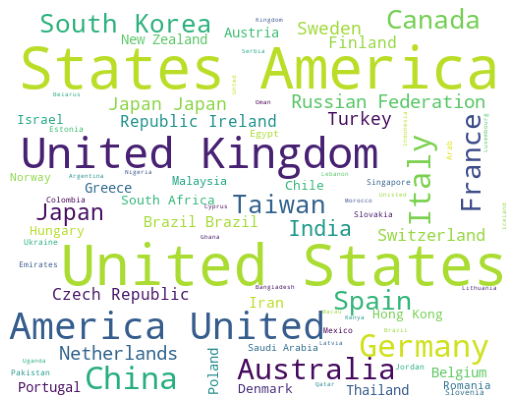

In [ ]:
plt.subplots(figsize=(9,9))
wordcloud = WordCloud(
    background_color='white', width=512, height=400
).generate(' '.join(df2016))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()